# ASTRA CREDIT SCORING

Data credit score berikut berisikan informasi mengenai pelanggan kartu kredit di suatu negara periode Januari hingga Maret 2015. 
Informasi yang didapatkan dari data pelanggan kartu kredit adalah :
* Latar belakang pelanggan
* Jumlah tagihan
* Jumlah pembayaran
* Lama keterlambatan pembayaran
* Status pembayaran bulan berikutnya (April 2015)

Pada project ini akan dilakukan prediksi untuk mengetahui keterlambatan pembayaran pelanggan pada bulan Mei 2015 berdasarkan data Februari hingga April 2015 pada data testing.

In [128]:
import numpy as np
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#### Input Data Training dan Testing Pelanggan Kartu Kredit

Data training akan digunakan untuk membangun model sebelum memprediksi keterlambatan pembayaran kredit. Model terbaik pada data training akan digunakan untuk memprediksi keterlambatan menggunakan data testing.

In [173]:
training=pd.read_csv('training.csv')
training.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [130]:
testing=pd.read_csv('testing.csv',sep=';')
testing.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


### Data Description

In [131]:
training.shape

(16625, 16)

In [176]:
testing.shape

(16625, 16)

In [178]:
training.describe()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,8313.000000,157608.781955,1.476932,2.117534,1.588752,43.373955,0.482226,0.430256,0.397293,50720.634827,48815.920662,46471.030556,5175.054075,4973.786105,4830.003368,0.399158
std,4799.368448,124931.062684,0.523590,0.791191,0.492075,8.777974,0.835516,0.881835,0.853110,73365.449060,70753.129768,68182.984755,15033.589318,14867.362888,15646.002915,0.489740
min,1.000000,0.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,-165580.000000,-69777.000000,-61506.000000,0.000000,0.000000,0.000000,0.000000
25%,4157.000000,50000.000000,1.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,3491.000000,2997.000000,2550.000000,566.000000,451.000000,306.000000,0.000000
50%,8313.000000,120000.000000,1.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,21943.000000,20987.000000,19954.000000,2000.000000,2000.000000,1637.000000,0.000000
75%,12469.000000,230000.000000,2.000000,3.000000,2.000000,49.000000,1.000000,0.000000,0.000000,65903.000000,62725.000000,59111.000000,5000.000000,4696.000000,4025.000000,1.000000
max,16625.000000,800000.000000,3.000000,4.000000,2.000000,72.000000,4.000000,4.000000,4.000000,746814.000000,646770.000000,693131.000000,505000.000000,384986.000000,508229.000000,1.000000


### Data Information

In [133]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


### Identification Outlier

Ditemukan outlier pada delapan feature yang akan dianalisis

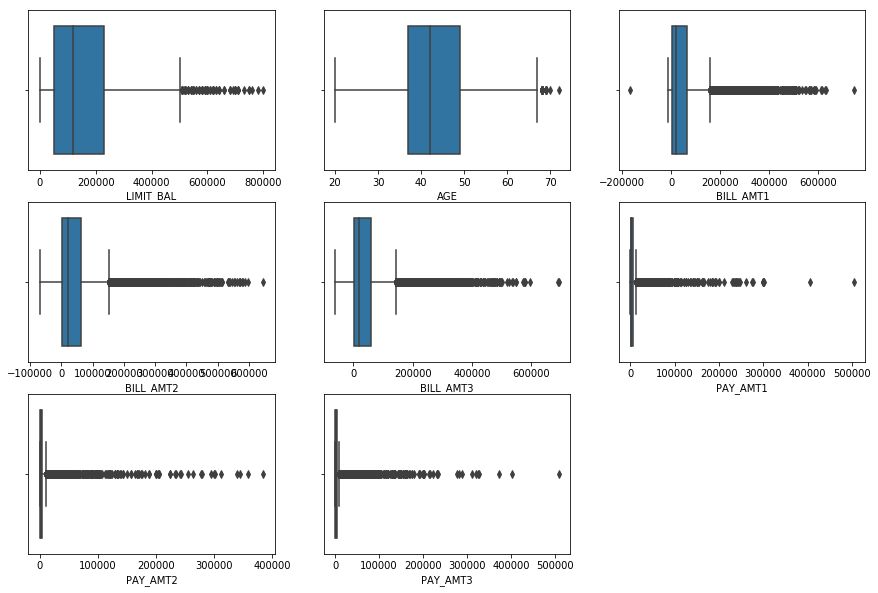

In [207]:
f=plt.figure(figsize=(15,10))
f.add_subplot(3,3,1)
g = sns.boxplot(x=training['LIMIT_BAL'])
f.add_subplot(3,3,2)
g = sns.boxplot(x=training['AGE'])
f.add_subplot(3,3,3)
g = sns.boxplot(x=training['BILL_AMT1'])
f.add_subplot(3,3,4)
g = sns.boxplot(x=training['BILL_AMT2'])
f.add_subplot(3,3,5)
g = sns.boxplot(x=training['BILL_AMT3'])
f.add_subplot(3,3,6)
g = sns.boxplot(x=training['PAY_AMT1'])
f.add_subplot(3,3,7)
g = sns.boxplot(x=training['PAY_AMT2'])
f.add_subplot(3,3,8)
g = sns.boxplot(x=training['PAY_AMT3'])

## Eksplorasi Data

### USIA PENGGUNA CREDIT

Usia pengguna credit paling banyak berada pada usia 40-60 tahun sebesar 51,68%

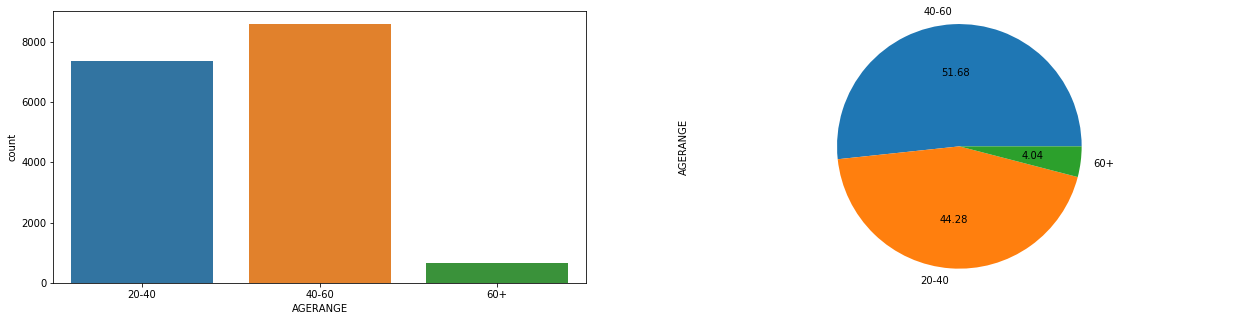

In [208]:
bins = [20,40,60, np.inf]
label = ['20-40', '40-60', '60+']

training['AGERANGE'] = pd.cut(training['AGE'], bins, labels=label)

f = plt.figure(figsize=(21,5))
f.add_subplot(1,2,1)
sns.countplot(training['AGERANGE'])
f.add_subplot(1,2,2)
training['AGERANGE'].value_counts().plot.pie(autopct = '%.2f' )
plt.axis('equal')

plt.show()

### Latar Belakang Pendidikan

Pengguna kartu kredit paling banyak merupakan lulusan sarjana dan diploma

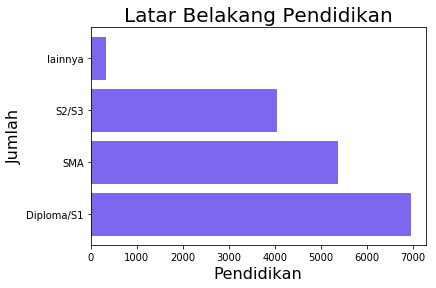

In [185]:
label=['Diploma/S1','SMA','S2/S3','lainnya']
pos=np.arange(len(label))
Y=training.EDUCATION.value_counts()
plt.barh(pos,Y,color='mediumslateblue',edgecolor='mediumslateblue')
plt.yticks(pos, label)
plt.xlabel('Pendidikan', fontsize=16)
plt.ylabel('Jumlah', fontsize=16)
plt.title('Latar Belakang Pendidikan',fontsize=20)
plt.show()

### Keterlambatan Pembayaran

Kode target menunjukkan :
* 0 = tidak terlambat
* 1 = terlambat

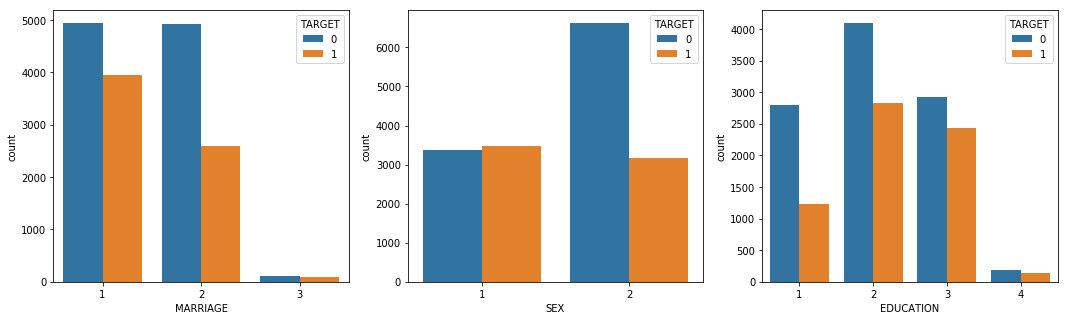

In [184]:
f=plt.figure(figsize=(18,5))
f.add_subplot(1,3,1)
g = sns.countplot(data=training, x='MARRIAGE', hue='TARGET')
f.add_subplot(1,3,2)
g = sns.countplot(data=training, x='SEX', hue='TARGET')
f.add_subplot(1,3,3)
g = sns.countplot(data=training, x='EDUCATION', hue='TARGET')

**Status Pernikahan** : Pengguna yang belum menikah (kode=1) dan yang telah menikah (kode=2) lebih besar melakukan pembayaran kredit tidak terlambat
    
**Jenis Kelamin** : Pada pria (kode=1) pembayaran antara terlambat dan tidak terlambat memiliki perbedaan yang kecil dan cenderung terlambat dibandingkan wanita (kode=2)

**Latar Belakang Pendidikan** : Pengguna kartu kredit semua menyelesaikan pembayaran tidak terlambat.

### Batas Maksimal Kredit

Text(0.5,0,'TARGET')

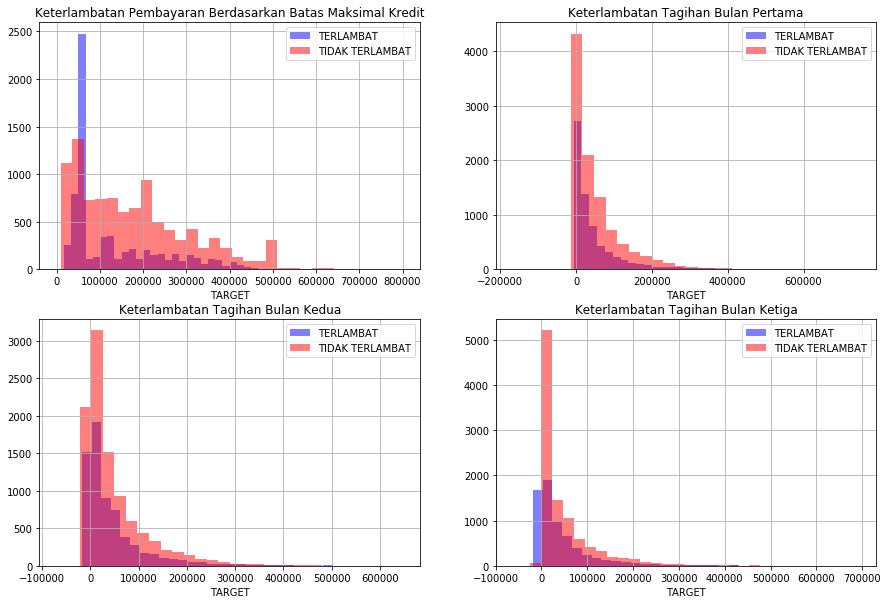

In [222]:
f=plt.figure(figsize=(15,10))
f.add_subplot(2,2,1)
training[training['TARGET']==1]['LIMIT_BAL'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TERLAMBAT')
training[training['TARGET']==0]['LIMIT_BAL'].hist(alpha=0.5,color='red',
                                              bins=30,label='TIDAK TERLAMBAT')
plt.legend()
plt.title('Keterlambatan Pembayaran Berdasarkan Batas Maksimal Kredit',fontsize=12)
plt.xlabel('TARGET')

f.add_subplot(2,2,2)
training[training['TARGET']==1]['BILL_AMT1'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TERLAMBAT')
training[training['TARGET']==0]['BILL_AMT1'].hist(alpha=0.5,color='red',
                                              bins=30,label='TIDAK TERLAMBAT')
plt.legend()
plt.title('Keterlambatan Tagihan Bulan Pertama',fontsize=12)
plt.xlabel('TARGET')

f.add_subplot(2,2,3)
training[training['TARGET']==1]['BILL_AMT2'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TERLAMBAT')
training[training['TARGET']==0]['BILL_AMT2'].hist(alpha=0.5,color='red',
                                              bins=30,label='TIDAK TERLAMBAT')
plt.legend()
plt.title('Keterlambatan Tagihan Bulan Kedua',fontsize=12)
plt.xlabel('TARGET')

f.add_subplot(2,2,4)
training[training['TARGET']==1]['BILL_AMT3'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TERLAMBAT')
training[training['TARGET']==0]['BILL_AMT3'].hist(alpha=0.5,color='red',
                                              bins=30,label='TIDAK TERLAMBAT')
plt.legend()
plt.title('Keterlambatan Tagihan Bulan Ketiga',fontsize=12)
plt.xlabel('TARGET')

Batas pembayaran kredit USD 0 hingga USD 100000 memikiki tingkat keterlambatan paling tinggi. Dari tagihan bulan Februari hingga bulan April 2015 pada interval USD 0 hingga USD 100000 pembayaran kredit yang tidak terlambat lebih tinggi dibandingkan yang terlambat pada interval tagihan lainnya.

## MODELLING

### Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier
x=training.drop(['TARGET','ID','AGERANGE'],axis=1)
y=training['TARGET']
testing1=testing.drop(['ID'],axis=1)

#### Split Data Training and Testing

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [148]:
RestoTree = DecisionTreeClassifier(criterion="gini", max_depth = 10)
RestoTree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [206]:
RestoTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Akurasi Decision Tree

In [213]:
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
akurasi_dtree=metrics.accuracy_score(y_test, predTree)
print("Akurasi Decision Tree: ",akurasi_dtree )

Akurasi Decision Tree:  0.84943865276664


In [214]:
print(classification_report(y_test, predTree))

             precision    recall  f1-score   support

          0       0.88      0.87      0.88      3011
          1       0.81      0.81      0.81      1977

avg / total       0.85      0.85      0.85      4988



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
predForest=clf.predict(x_test)
predForest

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

#### Akurasi Random Forest

In [211]:
akurasi_forest=metrics.accuracy_score(y_test, predForest)
print("Akurasi Random Forest: ",akurasi_forest )

Akurasi Random Forest:  0.8799117882919005


In [212]:
print(classification_report(y_test, predForest))

             precision    recall  f1-score   support

          0       0.89      0.91      0.90      3011
          1       0.86      0.83      0.85      1977

avg / total       0.88      0.88      0.88      4988



### Pemilihan Metode Prediksi Keterlambatan

Pemilihan metode untuk memprediksi keterlambatan dilihat berdasarkan akurasi tertinggi dari kedua metode yakni decision tree dan random forest.

In [162]:
if akurasi_dtree > akurasi_forest:
    print('Metode Decision Tree dengan akurasi :',akurasi_dtree)
else:
    print('Metode Random Forest dengan akurasi ',akurasi_forest)  

Metode Random Forest dengan akurasi  0.8789093825180433


### Prediksi Menggunakan Random Forest

In [154]:
predForest1=clf.predict(testing1)
predForest1

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [182]:
testing['TARGET']=predForest1
testing.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0


## Kesimpulan :
Prediksi keterlambatan pembayaran kredit pelanggan pada bulan Mei 2015 berdasarkan data Februari hingga April 2015 pada data testing menggunakan metode random forest dengan akurasi sebesar 87,99%